In [1]:
# equations and such from 1405.7365 for the most part
# some of this will have to be new because there are more restrictions for higher dimensions than paper implies
# more detailed (schizo) comments are left in the PertRNBH before this guy

In [2]:
import sympy as smp
import matplotlib.pyplot as plt
smp.init_printing(use_latex='mathjax')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
import numpy as np
import scipy as sp

In [3]:
# We figured out that the math doesnt suck when we have d = 2, so we'll build and test with this and then introduce the extra cubic cutoff term for d>2

In [174]:
rmax = 1000000000
num = 100

In [175]:
d = 3
k = 0
l = 1
q = 0

In [176]:
# surely there exist EQ numbers for all these in the 14** paper

In [177]:
def mu(R):
    return (R**(d-2))*(k+(q**2)/(R**(2*d-4))+(R**2)/(l**2))

def f(r,R):
    return k - mu(R)/(r**(d-2)) + (q**2)/(r**(2*d-4)) + (r**2)/(l**2)

def fp(r,R):
    return (d-2)*mu(R)/(r**(d-3)) + (4-2*d)*(q**2)/(r**(2*d-5))+ 2*r/(l**2)

def beta(R):
    return 4 * np.pi / fp(R,R)

def gamma2(r0,R):
    return -1*f(r0,R)*(r0**(2*d-4))

In [193]:
def k1(r0grid,R):
    list = []
    for i in range(num):
        r0 = r0grid[i]
        rbar = R / 2
        rgrid = np.linspace(rbar,r0,num)
        integ = 1/f(rgrid,R)
        mask = np.isfinite(integ)
        sum =  (4 * np.pi / beta(R)) * np.trapezoid(integ[mask],rgrid[mask])
        list.append(sum)
    return np.array(list)

def k2(r0grid,R):
    list = []
    for i in range(num):
        r0 = r0grid[i]
        rgrid = np.logspace(np.log10(R+0.1),np.log10(rmax-0.1),num)
        integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
        mask = np.isfinite(integ)
        sum = (2*np.pi/beta(R)) * np.trapezoid(integ[mask],rgrid[mask])
        list.append(sum)
    return np.array(list)

def k3(r0grid,R):
    list = []
    for i in range(num):
        r0 = r0grid[i]
        rgrid = np.linspace(r0,0.999*R,num)
        integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
        for idx in range(len(integ)):
            if (1+f(rgrid[idx],R)*(rgrid[idx]**(2*d-4))/(gamma2(r0,R))) <= 0:
                integ[idx]=0
        mask = np.isfinite(integ)
        print(integ)
        sum = (4*np.pi/beta(R)) * np.trapezoid(integ[mask],rgrid[mask])
        list.append(sum)
    return np.array(list)

In [194]:
def alpha(r0grid,R):
    return 2*np.exp(k1(r0grid,R)+k2(r0grid,R)+k3(r0grid,R))

In [195]:
R = 100
r0min = 0.001
r0grid = np.linspace(0.001,0.999*R,num)
alphagrid = alpha(r0grid,R)

k1grid = k1(r0grid,R)


k2grid = k2(r0grid,R)


k3grid = k3(r0grid,R)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\729117588.py:29: RuntimeWarning: invalid value encountered in sqrt
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\729117588.py:29: RuntimeWarning: divide by zero encountered in divide
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\3174369111.py:2: RuntimeWarning: overflow encountered in exp
  return 2*np.exp(k1(r0grid,R)+k2(r0grid,R)+k3(r0grid,R))


In [196]:
k3grid = k3(r0grid,R)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\729117588.py:29: RuntimeWarning: invalid value encountered in sqrt
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\729117588.py:29: RuntimeWarning: divide by zero encountered in divide
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)


In [192]:
alphagrid

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf])

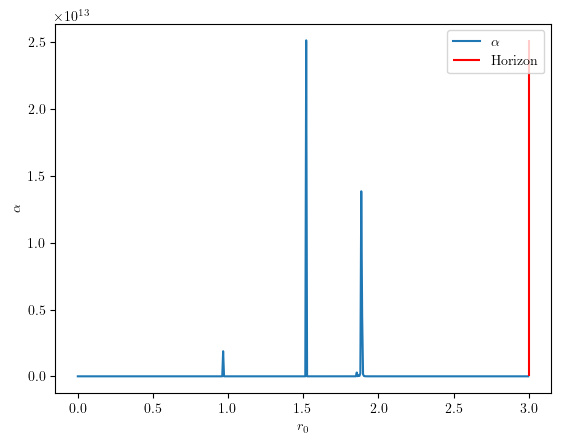

In [168]:
plt.plot(r0grid,alphagrid,label=r'$\alpha$')
plt.xlabel(r'$r_0$')
plt.ylabel(r'$\alpha$')
plt.vlines(R,alphagrid.min(),alphagrid.max(),colors='r',label="Horizon")
# plt.semilogy()
plt.legend()
# plt.ylim((1,10))
plt.show()

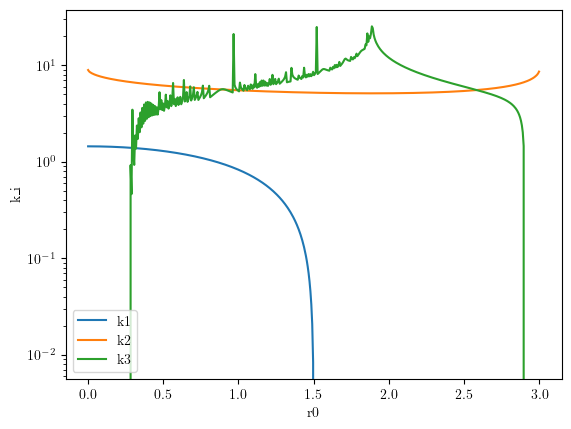

In [169]:
plt.plot(r0grid,k1grid,label='k1')
plt.plot(r0grid,k2grid,label='k2')
plt.plot(r0grid,k3grid,label='k3')
plt.xlabel('r0')
plt.ylabel('k_i')
plt.legend()
# plt.semilogx()
plt.semilogy()
plt.show()

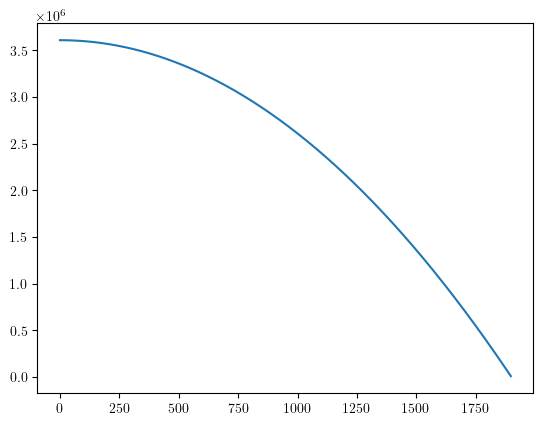

In [14]:
plt.plot(r0grid,gamma2(r0grid,R))

In [15]:
def det(rgrid,R):
    # rough estimate of r_crit in EQ 40 of 1405.7365
    eqgrid = fp(rgrid,R)*rgrid+(2*d-4)*f(rgrid,R)
    # print(f'eqgrid: {eqgrid}')
    # print(f'abseqgrid: {np.abs(eqgrid)}')
    minloc = np.argmin(np.abs(eqgrid))
    return eqgrid[minloc],rgrid[minloc]

det(np.linspace(0.001,R,1000000),R)

(2e-06, 0.001)

In [16]:
# this is not consistent with what the paper expects, huh
#  time to calculate some area i guess

In [17]:
def AInteg(rgrid,r0,R):
    return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))

def divArea(rgrid,R):
    return (rgrid**(d-2)) / np.sqrt(f(rgrid,R))

In [18]:
def shockArea(r0grid,R):
    areaList = []
    area1List = [] # this guy and below are for debug
    area2List = []
    rgrid1 = np.logspace(np.log10(R+0.1),np.log10(rmax-1),num)
    divAreaInteg = divArea(rgrid1,R)
    for i in range(num):
        r0 = r0grid[i]
        rgrid2 = np.linspace(r0,R-0.1,num)
        areaInteg1 = AInteg(rgrid1,r0,R) - divAreaInteg
        area1 = np.trapezoid(areaInteg1,rgrid1)
        areaInteg2 = AInteg(rgrid2,r0,R)
        mask = np.isfinite(areaInteg2)
        area2 = np.trapezoid(areaInteg2[mask],rgrid2[mask])
        areaSum = (2 * area1) + (4 * area2)
        areaList.append(areaSum)
        area1List.append(area1)
        area2List.append(area2)
    return np.array(areaList) # , area1List, area2List

In [19]:
areaInt = shockArea(r0grid,R)

C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\2322992211.py:2: RuntimeWarning: divide by zero encountered in divide
  return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\2322992211.py:2: RuntimeWarning: invalid value encountered in sqrt
  return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))


Text(0, 0.5, 'shocked area')

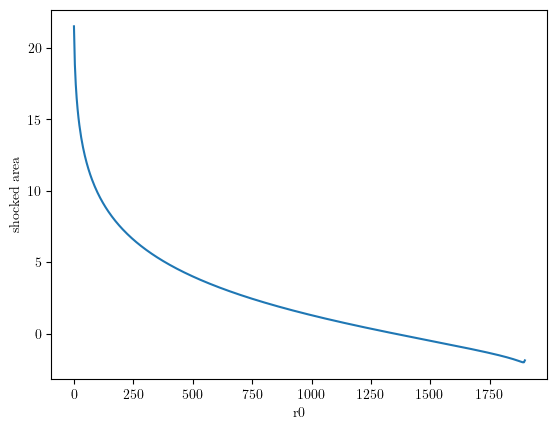

In [20]:
plt.plot(r0grid,areaInt)
plt.xlabel('r0')
plt.ylabel('shocked area')

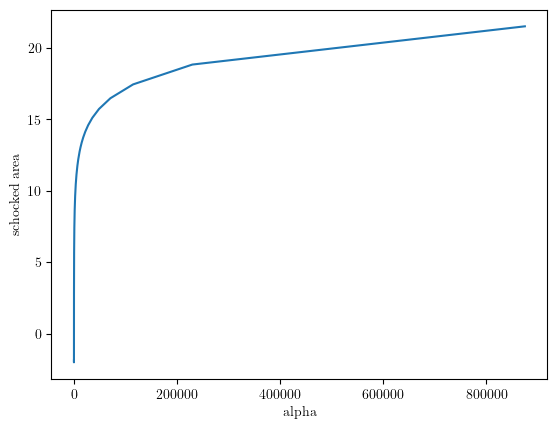

In [21]:
plt.plot(alphagrid,areaInt)
plt.xlabel('alpha')
plt.ylabel('schocked area')
plt.show()

In [50]:
alphagrid

array([8.74900182e+05, 2.29654848e+05, 1.14712625e+05, 7.06943496e+04,
       4.85884319e+04, 3.57331811e+04, 2.75260989e+04, 2.19342889e+04,
       1.79365508e+04, 1.49703777e+04, 1.27035904e+04, 1.09290202e+04,
       9.51164509e+03, 8.36020836e+03, 7.41112153e+03, 6.61890804e+03,
       5.95030619e+03, 5.38050743e+03, 4.89068648e+03, 4.46633835e+03,
       4.09613324e+03, 3.77111218e+03, 3.48411189e+03, 3.22934686e+03,
       3.00210119e+03, 2.79849828e+03, 2.61532668e+03, 2.44990685e+03,
       2.29998824e+03, 2.16366887e+03, 2.03933220e+03, 1.92559686e+03,
       1.82127656e+03, 1.72534771e+03, 1.63692327e+03, 1.55523127e+03,
       1.47959729e+03, 1.40942993e+03, 1.34420881e+03, 1.28347447e+03,
       1.22681998e+03, 1.17388390e+03, 1.12434419e+03, 1.07791323e+03,
       1.03433342e+03, 9.93373486e+02, 9.54825308e+02, 9.18501180e+02,
       8.84231433e+02, 8.51862389e+02, 8.21254576e+02, 7.92281171e+02,
       7.64826645e+02, 7.38785566e+02, 7.14061559e+02, 6.90566376e+02,
      

In [22]:
# lets relate L and rmin so we can find critical length scales later, equation 11
def Lvsrmin(rminarr,R):
    Larr = []
    for rmin in rminarr:
        rarr = np.logspace(np.log10(rmin+0.1),np.log10(rmax-1),num)
        integ = 2*l/(rarr*np.sqrt(f(rarr,R)*((rarr/rmin)**(2*d-2))-f(rarr,R)))
        L = np.trapezoid(integ,rarr)
        if np.isfinite(L):
            Larr.append(L)
        else:
            Larr.append(0)
    return np.array(Larr)

In [23]:
# now lets do the areas of unshocked regions, this area functional comes from EQ 12
# these unshocked areas are gonna be ultimately dependent on the strip width for like real params, but for now we can just punch in rmin
def unAreaInt(rminarr,R): # area for one unbroken surface
    arealist = []
    for rmin in rminarr:
        r = np.logspace(np.log10(rmin+0.1),np.log10(rmax-0.1),num)
        integ = 2 * (r**(d-2))/np.sqrt(f(r,R)-f(r,R)*((rmin/r)**(2*d-2)))
        area = np.trapezoid(integ,r)
        arealist.append(area)
    return np.array(arealist)

In [24]:
rminarr = np.logspace(np.log10(R+0.1),np.log10(rmax-1),num)

In [25]:
LvsrminArr = Lvsrmin(rminarr,R)

C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\1961872960.py:6: RuntimeWarning: divide by zero encountered in divide
  integ = 2*l/(rarr*np.sqrt(f(rarr,R)*((rarr/rmin)**(2*d-2))-f(rarr,R)))


[]

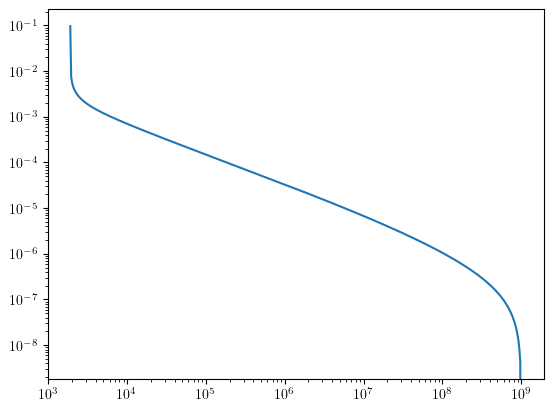

In [26]:
plt.plot(rminarr,LvsrminArr)
plt.semilogx()
plt.semilogy()

In [27]:
unArea = unAreaInt(rminarr,R)

In [28]:
unArea

array([2.09580012e+02, 4.08642314e+01, 3.73184269e+01, 3.56805572e+01,
       3.46731879e+01, 3.39680751e+01, 3.34363323e+01, 3.30153606e+01,
       3.26704897e+01, 3.23807100e+01, 3.21324234e+01, 3.19163750e+01,
       3.17260095e+01, 3.15565323e+01, 3.14043411e+01, 3.12666681e+01,
       3.11413455e+01, 3.10266474e+01, 3.09211793e+01, 3.08238006e+01,
       3.07335675e+01, 3.06496913e+01, 3.05715071e+01, 3.04984497e+01,
       3.04300351e+01, 3.03658462e+01, 3.03055213e+01, 3.02487451e+01,
       3.01952411e+01, 3.01447661e+01, 3.00971049e+01, 3.00520666e+01,
       3.00094809e+01, 2.99691959e+01, 2.99310750e+01, 2.98949958e+01,
       2.98608476e+01, 2.98285304e+01, 2.97979539e+01, 2.97690358e+01,
       2.97417015e+01, 2.97158828e+01, 2.96915176e+01, 2.96685494e+01,
       2.96469260e+01, 2.96266000e+01, 2.96075279e+01, 2.95896696e+01,
       2.95729884e+01, 2.95574507e+01, 2.95430253e+01, 2.95296838e+01,
       2.95173999e+01, 2.95061497e+01, 2.94959108e+01, 2.94866631e+01,
      

In [29]:
LvsrminArr

array([9.64359083e-02, 7.51743774e-03, 5.60429182e-03, 4.70823903e-03,
       4.15042422e-03, 3.75562668e-03, 3.45477421e-03, 3.21419718e-03,
       3.01518442e-03, 2.84636037e-03, 2.70033984e-03, 2.57208136e-03,
       2.45800407e-03, 2.35548138e-03, 2.26253469e-03, 2.17763978e-03,
       2.09959977e-03, 2.02745920e-03, 1.96044430e-03, 1.89792041e-03,
       1.83936113e-03, 1.78432545e-03, 1.73244055e-03, 1.68338867e-03,
       1.63689701e-03, 1.59272973e-03, 1.55068174e-03, 1.51057364e-03,
       1.47224768e-03, 1.43556450e-03, 1.40040038e-03, 1.36664509e-03,
       1.33419998e-03, 1.30297647e-03, 1.27289474e-03, 1.24388260e-03,
       1.21587463e-03, 1.18881130e-03, 1.16263834e-03, 1.13730611e-03,
       1.11276915e-03, 1.08898566e-03, 1.06591717e-03, 1.04352817e-03,
       1.02178584e-03, 1.00065975e-03, 9.80121688e-04, 9.60145390e-04,
       9.40706407e-04, 9.21781921e-04, 9.03350607e-04, 8.85392504e-04,
       8.67888899e-04, 8.50822225e-04, 8.34175964e-04, 8.17934566e-04,
      

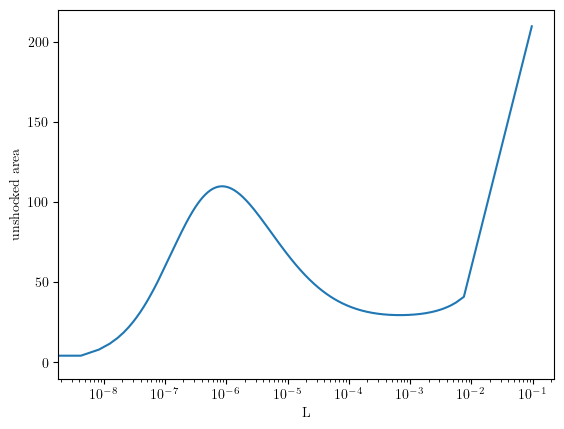

In [30]:
plt.plot(LvsrminArr,unArea)
plt.xlabel("L")
plt.ylabel("unshocked area")
plt.semilogx()
plt.show()

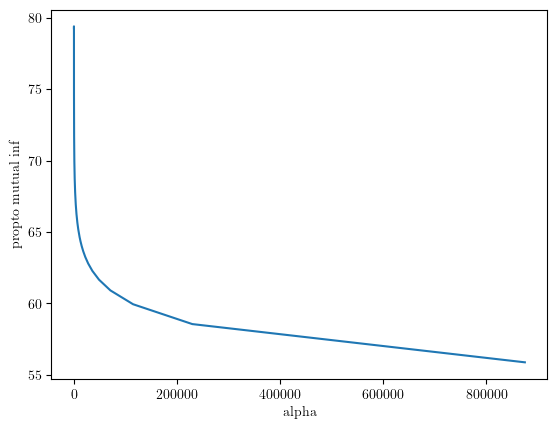

In [31]:
plt.plot(alphagrid,(2*unArea[200]-areaInt))
plt.xlabel("alpha")
plt.ylabel("propto mutual inf")
plt.show()

In [32]:
np.argmin(np.abs(2*unArea[-2]-areaInt),0)

np.int64(41)

In [33]:
# ok i have no idea what to expect from this jawn
# i guess we could plot like the Lcrit vs alpha in the flavor of figure 1?

In [124]:
def LCritFunc(Lgrid,alphagrid,unShockGrid,shockGrid):
    Lcritarr = []
    for i in range(len(alphagrid)):
        shockArea = shockGrid[i]
        mutinfGrid = 2 * unShockGrid - shockArea
        mutinfInterp = sp.interpolate.interp1d(mutinfGrid,Lgrid,fill_value="extrapolate")
        Lcrit = mutinfInterp(0)
        Lcritarr.append(Lcrit)
    return np.array(Lcritarr)
        


In [35]:
LCvsalpha = LCritFunc(LvsrminArr,alphagrid,unArea,areaInt)

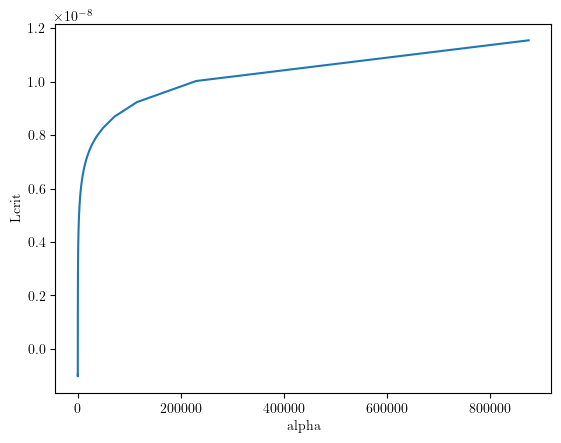

In [36]:
plt.plot(alphagrid,LCvsalpha)
plt.xlabel('alpha')
plt.ylabel('Lcrit')
# plt.semilogy()
# plt.semilogx()
plt.show()

In [37]:
# # oh god its broken lets fix it
# Lcritarr = []
# for i in range(len(alphagrid)):
#     alpha = alphagrid[i]
#     # print(alpha)
#     shockArea = areaInt[i]
#     # print(shockArea)
#     mutinfGrid = 2 * unArea - shockArea
#     with open('mutinfgrid.txt','a') as f:
#         print(f'\n {mutinfGrid}',file=f)
#     mutinfInterp = sp.interpolate.interp1d(mutinfGrid,LvsrminArr,fill_value="extrapolate")
#     Lcrit = mutinfInterp(0)
#     print(Lcrit)
#     # critIdx = np.argmin(np.abs(mutinfGrid)) # this precision sucks, a better way to do in future is interpolate but im not troubleshooting that rn

#     # print(critIdx)
#     # Lcrit = LvsrminArr[critIdx]
#     # print(Lcrit)
#     Lcritarr.append(Lcrit)
# Lcritarr = np.array(Lcritarr)

In [61]:
# lets make some big functions that work at different temperatures to put in the big boy python script

In [82]:
def genAlphaPlot(Rmin,Rmax,Rnum,Rtyp='lin'):
    if Rtyp == 'lin':
        Rgrid = np.linspace(Rmin,Rmax,Rnum)
    elif Rtyp == 'log':
        Rgrid = np.logspace(np.log10(Rmin),np.log10(Rmax),Rnum)
    else:
        print('Invalid Rtyp, use lin or log')
        return 0
    
    for R in Rgrid:
        r0grid = np.linspace(r0min,0.999*R,num)
        alphagrid = alpha(r0grid,R)
        plt.plot(r0grid,alphagrid,label=f'R = {R:.3f}')

    plt.xlabel(r'$r_0$')
    plt.ylabel(r'$\alpha$')
    # plt.vlines(R,alphagrid.min(),alphagrid.max(),colors='r',label="Horizon")
    plt.semilogy()
    plt.legend()
    plt.show()

    # for plotting of k functions at different temperatures, uncomment. makes many a plot, not reccommended
    # k1grid = k1(r0grid,R)
    # k2grid = k2(r0grid,R)
    # k3grid = k3(r0grid,R)

    # plt.plot(r0grid,k1grid,label='k1')
    # plt.plot(r0grid,k2grid,label='k2')
    # plt.plot(r0grid,k3grid,label='k3')
    # plt.xlabel('r0')
    # plt.ylabel('k_i')
    # plt.legend()
    # # plt.semilogx()
    # plt.semilogy()
    # plt.show()

C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\687661607.py:29: RuntimeWarning: divide by zero encountered in divide
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\687661607.py:29: RuntimeWarning: invalid value encountered in sqrt
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\3174369111.py:2: RuntimeWarning: overflow encountered in exp
  return 2*np.exp(k1(r0grid,R)+k2(r0grid,R)+k3(r0grid,R))


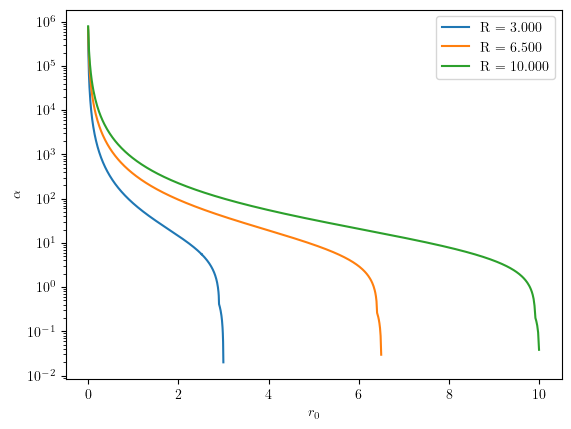

In [83]:
genAlphaPlot(3,10,3,'lin')

In [84]:
def genShockPlot(Rmin,Rmax,Rnum,Rtyp='lin'):
    if Rtyp == 'lin':
        Rgrid = np.linspace(Rmin,Rmax,Rnum)
    elif Rtyp == 'log':
        Rgrid = np.logspace(np.log10(Rmin),np.log10(Rmax),Rnum)
    else:
        print('Invalid Rtyp, use lin or log')
        return 0
    
    for R in Rgrid:
        r0grid = np.logspace(np.log10(r0min),np.log10(0.999*R),num)
        alphagrid = alpha(r0grid,R)
        areaInt = shockArea(r0grid,R)
        plt.plot(alphagrid,areaInt,label=f'R = {R:.3f}')
    
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'Area$_{A \cup B}$')
    plt.legend()
    # plt.semilogx()
    # plt.semilogy()
    plt.show()

C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\687661607.py:29: RuntimeWarning: divide by zero encountered in divide
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\687661607.py:29: RuntimeWarning: invalid value encountered in sqrt
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\2322992211.py:2: RuntimeWarning: divide by zero encountered in divide
  return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\2322992211.py:2: RuntimeWarning: invalid value encountered in sqrt
  return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))


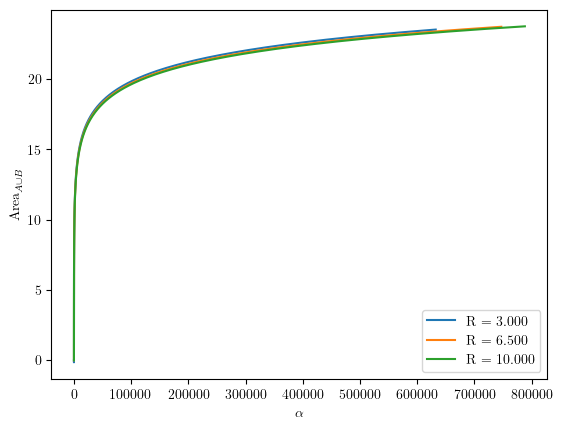

In [85]:
genShockPlot(3,10,3)

In [86]:
def genLvsrminPlot(Rmin,Rmax,Rnum,Rtyp='lin',rminmax=rmax):
    if Rtyp == 'lin':
        Rgrid = np.linspace(Rmin,Rmax,Rnum)
    elif Rtyp == 'log':
        Rgrid = np.logspace(np.log10(Rmin),np.log10(Rmax),Rnum)
    else:
        print('Invalid Rtyp, use lin or log')
        return 0
    
    for  R in Rgrid:
        rminarr = np.logspace(np.log10(R+0.1),np.log10(rmax-1),num)
        LvsrminArr = Lvsrmin(rminarr,R)
        plt.plot(rminarr,LvsrminArr,label=f'R = {R:.3f}')
    
    plt.xlabel(r'$r_{min}$')
    plt.ylabel(r'$L$')
    plt.xlim((2,rminmax))
    plt.legend()
    plt.semilogx()
    # plt.semilogy()
    plt.show()

C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\1961872960.py:6: RuntimeWarning: divide by zero encountered in divide
  integ = 2*l/(rarr*np.sqrt(f(rarr,R)*((rarr/rmin)**(2*d-2))-f(rarr,R)))


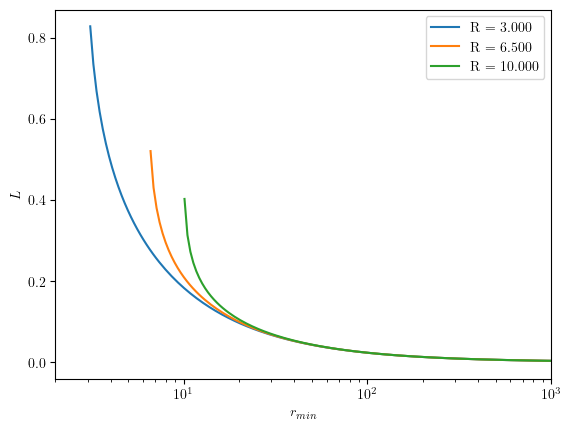

In [88]:
genLvsrminPlot(3,10,3,'lin',1000)

In [97]:
def genUnAreaPlot(Rmin,Rmax,Rnum,Rtyp='lin'):
    if Rtyp == 'lin':
        Rgrid = np.linspace(Rmin,Rmax,Rnum)
    elif Rtyp == 'log':
        Rgrid = np.logspace(np.log10(Rmin),np.log10(Rmax),Rnum)
    else:
        print('Invalid Rtyp, use lin or log')
        return 0
    
    for  R in Rgrid:
        rminarr = np.logspace(np.log10(R+0.1),np.log10(rmax-1),num)
        LArr = Lvsrmin(rminarr,R)
        unArea = unAreaInt(rminarr,R)
        plt.plot(LArr,unArea,label=f'R = {R:.3f}')
    
    plt.xlabel(r'$L$')
    plt.ylabel(r'Area$_{A}$')
    plt.semilogx()
    # plt.semilogy()
    plt.legend()
    plt.show()

C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\1961872960.py:6: RuntimeWarning: divide by zero encountered in divide
  integ = 2*l/(rarr*np.sqrt(f(rarr,R)*((rarr/rmin)**(2*d-2))-f(rarr,R)))


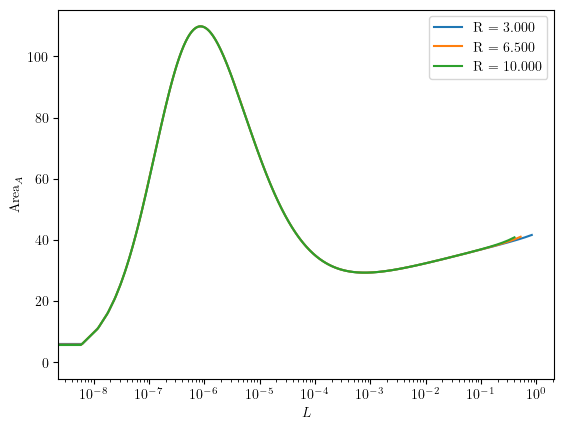

In [98]:
genUnAreaPlot(3,10,3)

In [122]:
def genMutInfPlot(Rmin,Rmax,Rnum,Rtyp='lin',Lidx=(num/2)):
    # can only give general shape of mutual information, as the "y" location is determined by the width of regions A and B
    # we will just pick a random index for now as default
    if Rtyp == 'lin':
        Rgrid = np.linspace(Rmin,Rmax,Rnum)
    elif Rtyp == 'log':
        Rgrid = np.logspace(np.log10(Rmin),np.log10(Rmax),Rnum)
    else:
        print('Invalid Rtyp, use lin or log')
        return 0
    
    Lidx = np.array(int(Lidx))

    for R in Rgrid:
        r0grid = np.logspace(np.log10(r0min),np.log10(0.999*R),num)
        rminarr = np.logspace(np.log10(R+0.1),np.log10(rmax-1),num)
        alphagrid = alpha(r0grid,R)
        unArea = unAreaInt(rminarr,R)
        areaInt = shockArea(r0grid,R)
        mutInf = 2*unArea[Lidx] - areaInt
        plt.plot(alphagrid,mutInf,label=f'R = {R:.3f}')
    
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\propto I(A,B)$')
    plt.legend()
    plt.semilogx()
    # plt.semilogy()
    plt.show()

C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\687661607.py:29: RuntimeWarning: divide by zero encountered in divide
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\687661607.py:29: RuntimeWarning: invalid value encountered in sqrt
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\2322992211.py:2: RuntimeWarning: divide by zero encountered in divide
  return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\2322992211.py:2: RuntimeWarning: invalid value encountered in sqrt
  return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))


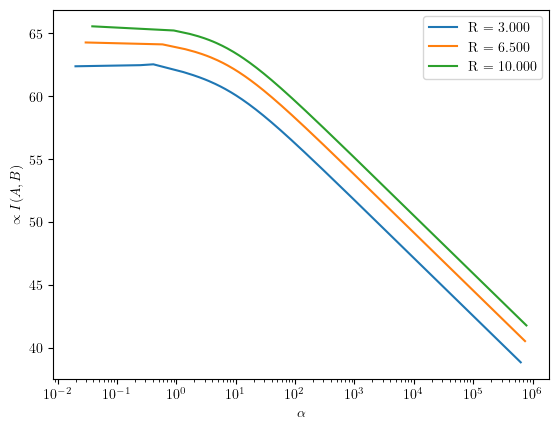

In [123]:
genMutInfPlot(3,10,3)

In [155]:
def genLCritPlot(Rmin,Rmax,Rnum,Rtyp='lin'):
    if Rtyp == 'lin':
        Rgrid = np.linspace(Rmin,Rmax,Rnum)
    elif Rtyp == 'log':
        Rgrid = np.logspace(np.log10(Rmin),np.log10(Rmax),Rnum)
    else:
        print('Invalid Rtyp, use lin or log')
        return 0

    for R in Rgrid:
        r0grid = np.logspace(np.log10(r0min),np.log10(0.999*R),num)
        rminarr = np.logspace(np.log10(R+0.1),np.log10(rmax-1),num)
        LArr = Lvsrmin(rminarr,R)
        alphagrid = alpha(r0grid,R)
        unArea = unAreaInt(rminarr,R)
        areaInt = shockArea(r0grid,R)
        LCArr = LCritFunc(LArr,alphagrid,unArea,areaInt)
        plt.plot(alphagrid,LCArr,label=f'R = {R:.3f}')
    
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$L_{crit.}$')
    plt.legend()
    plt.semilogx()
    # plt.semilogy()
    # plt.xlim((0.1,100))
    plt.show()

C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\1961872960.py:6: RuntimeWarning: divide by zero encountered in divide
  integ = 2*l/(rarr*np.sqrt(f(rarr,R)*((rarr/rmin)**(2*d-2))-f(rarr,R)))
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\687661607.py:29: RuntimeWarning: divide by zero encountered in divide
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\687661607.py:29: RuntimeWarning: invalid value encountered in sqrt
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\2322992211.py:2: RuntimeWarning: divide by zero encountered in divide
  return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))
C:\Users\bkoro\AppData\Local\Temp\ipykernel_39688\2322992211.py:2: RuntimeWarning: invalid value encountered in sqrt
  return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))


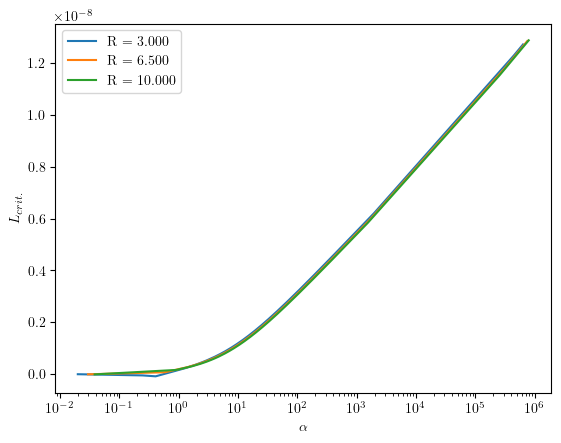

In [156]:
genLCritPlot(3,10,3)